In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [8]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [17]:
print(df.dtypes)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
print(df['streams'].isnull().sum())

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
cover_url                object
dtype: object
0


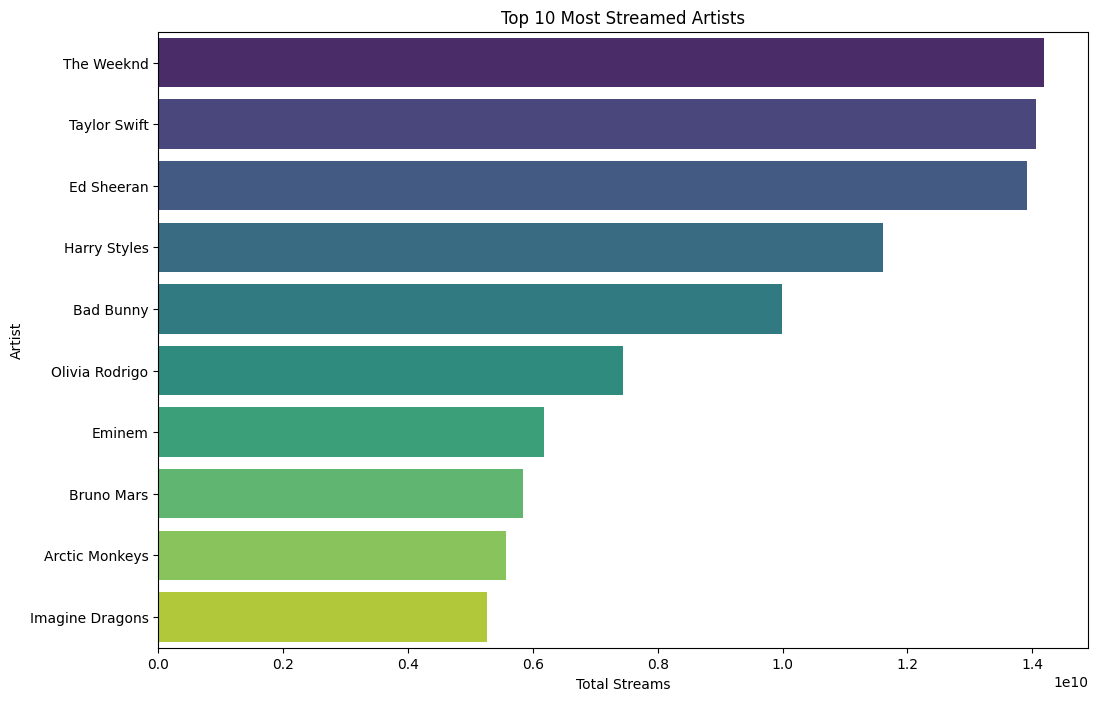

In [18]:
df = df.dropna(subset=['streams'])
top_artists = df.groupby('artist(s)_name')['streams'].sum().reset_index().sort_values(by='streams', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='streams', y='artist(s)_name', data=top_artists.head(10), palette='viridis')
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


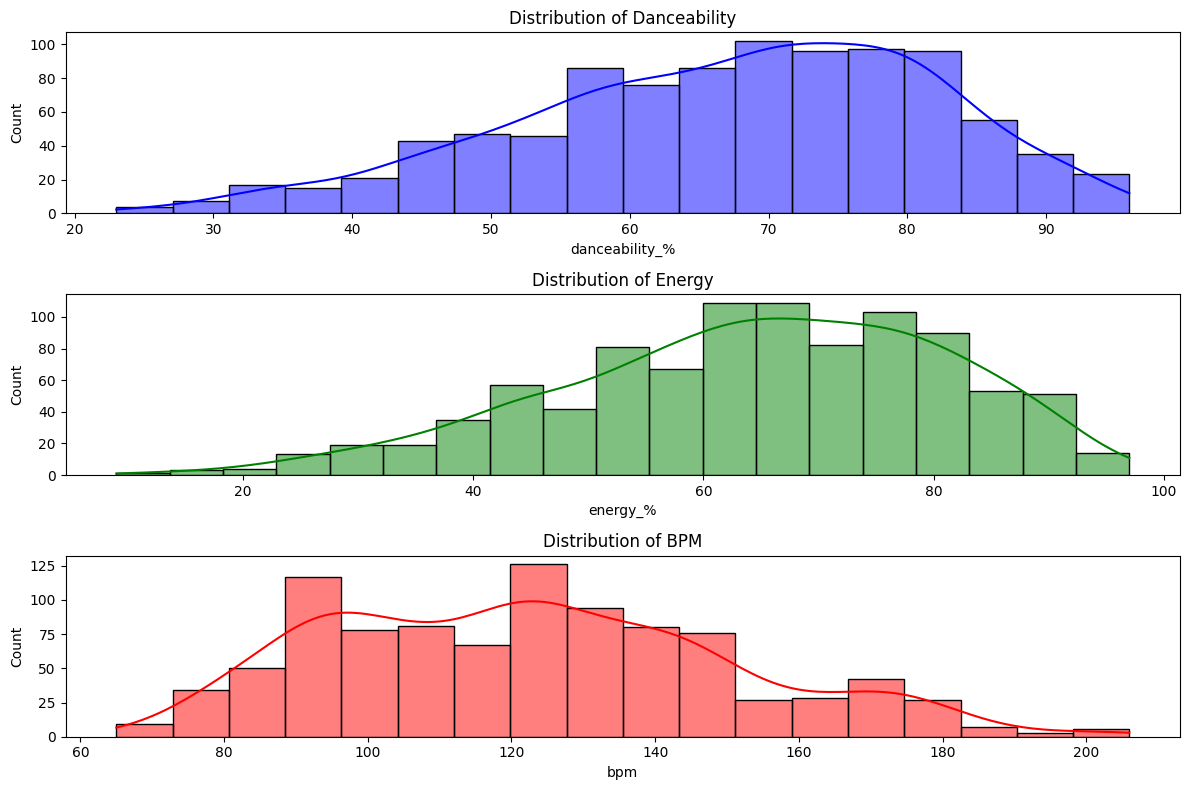

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(3, 1, 1)
sns.histplot(df['danceability_%'], kde=True, color='blue')
plt.title('Distribution of Danceability')

plt.subplot(3, 1, 2)
sns.histplot(df['energy_%'], kde=True, color='green')
plt.title('Distribution of Energy')

plt.subplot(3, 1, 3)
sns.histplot(df['bpm'], kde=True, color='red')
plt.title('Distribution of BPM')

plt.tight_layout()
plt.show()

In [23]:
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [24]:
print(df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].isnull().sum())

in_spotify_playlists     0
in_apple_playlists       0
in_deezer_playlists     79
dtype: int64


In [25]:
df['in_deezer_playlists'].fillna(0, inplace=True)

/tmp/ipykernel_30/2895236269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_deezer_playlists'].fillna(0, inplace=True)


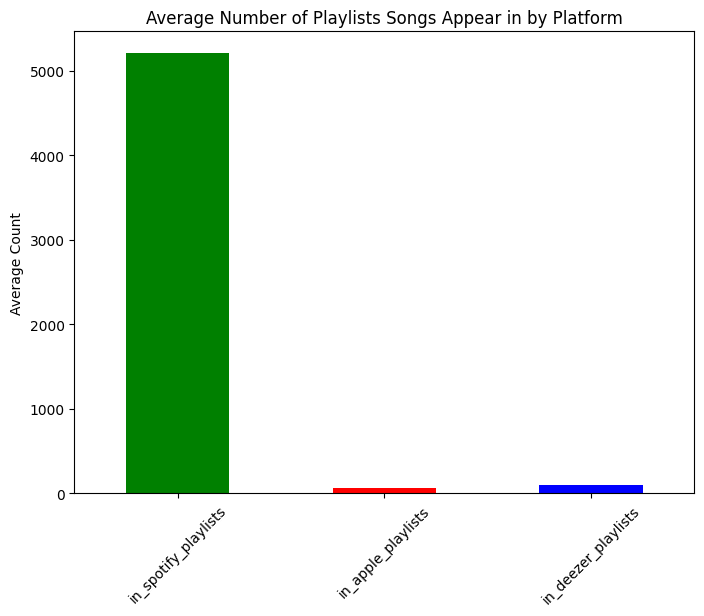

In [27]:
platforms_avg = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].mean()
platforms_avg.plot(kind='bar', figsize=(8,6), color=['green', 'red', 'blue'])
plt.title('Average Number of Playlists Songs Appear in by Platform')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
# correlation analysis

numeric_columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_numeric = df[numeric_columns]
df_numeric = df_numeric.dropna()

In [30]:
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                     streams       bpm  danceability_%  valence_%  energy_%  \
streams             1.000000 -0.002438       -0.105457  -0.040831 -0.026051   
bpm                -0.002438  1.000000       -0.147630   0.041693  0.025932   
danceability_%     -0.105457 -0.147630        1.000000   0.409873  0.198485   
valence_%          -0.040831  0.041693        0.409873   1.000000  0.357516   
energy_%           -0.026051  0.025932        0.198485   0.357516  1.000000   
acousticness_%     -0.004485 -0.018065       -0.237128  -0.081161 -0.577318   
instrumentalness_% -0.044902 -0.001283       -0.089371  -0.132765 -0.038492   
liveness_%         -0.048337 -0.000803       -0.077665   0.021382  0.117334   
speechiness_%      -0.112333  0.038937        0.184393   0.041874 -0.004632   

                    acousticness_%  instrumentalness_%  liveness_%  \
streams                  -0.004485           -0.044902   -0.048337   
bpm                      -0.018065           -0.001283   -0.000803   

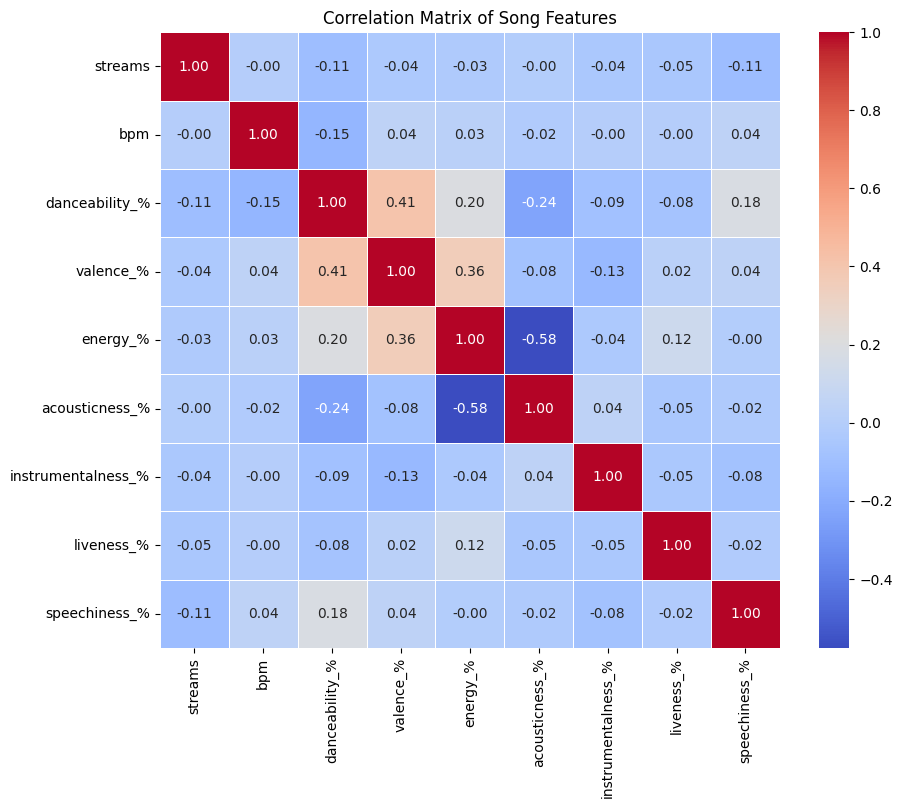

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Song Features')
plt.show()

In [32]:
correlation_with_streams = correlation_matrix['streams'].sort_values(ascending=False)
print(correlation_with_streams)

streams               1.000000
bpm                  -0.002438
acousticness_%       -0.004485
energy_%             -0.026051
valence_%            -0.040831
instrumentalness_%   -0.044902
liveness_%           -0.048337
danceability_%       -0.105457
speechiness_%        -0.112333
Name: streams, dtype: float64


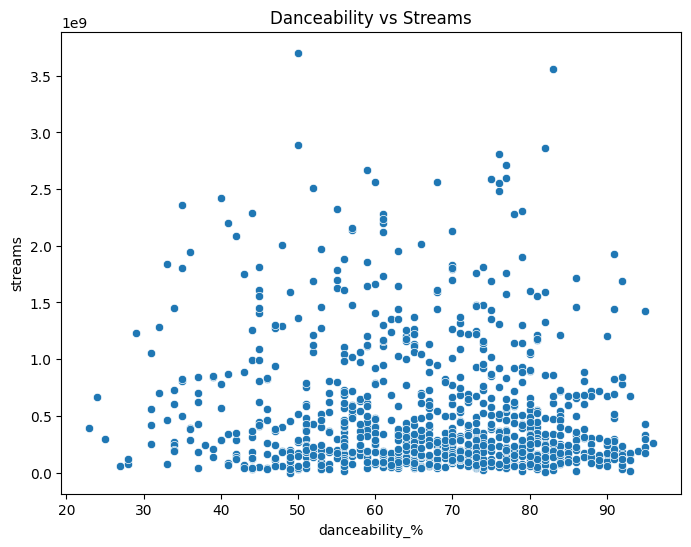

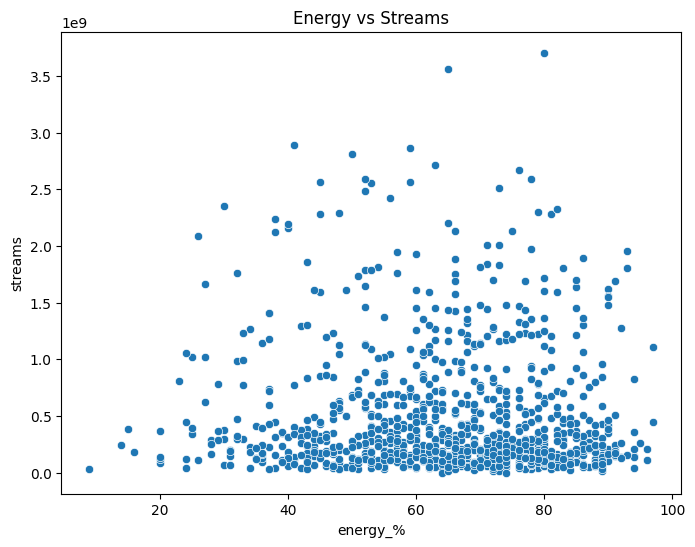

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability_%', y='streams', data=df_numeric)
plt.title('Danceability vs Streams')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='energy_%', y='streams', data=df_numeric)
plt.title('Energy vs Streams')
plt.show()

In [34]:
# artist analysis

artist_analysis = df.groupby('artist(s)_name').agg({
    'streams': 'sum',                    
    'track_name': 'count',               
    'danceability_%': 'mean',            
    'energy_%': 'mean',                  
    'valence_%': 'mean',                 
    'bpm': 'mean'                        
}).reset_index()
artist_analysis.rename(columns={'track_name': 'num_tracks'}, inplace=True)
artist_analysis.head()

,artist(s)_name,streams,num_tracks,danceability_%,energy_%,valence_%,bpm
0,(G)I-DLE,2.669833e+08,2,77.5,87.0,67.0,133.0
1,"21 Savage, Gunna",6.068094e+07,1,68.0,73.0,29.0,148.0
2,"24kgoldn, Iann Dior",1.699402e+09,1,70.0,72.0,76.0,91.0
3,50 Cent,1.202723e+09,1,90.0,71.0,79.0,90.0
4,"A$AP Rocky, Metro Boomin, Roisee",9.418647e+07,1,60.0,53.0,13.0,90.0


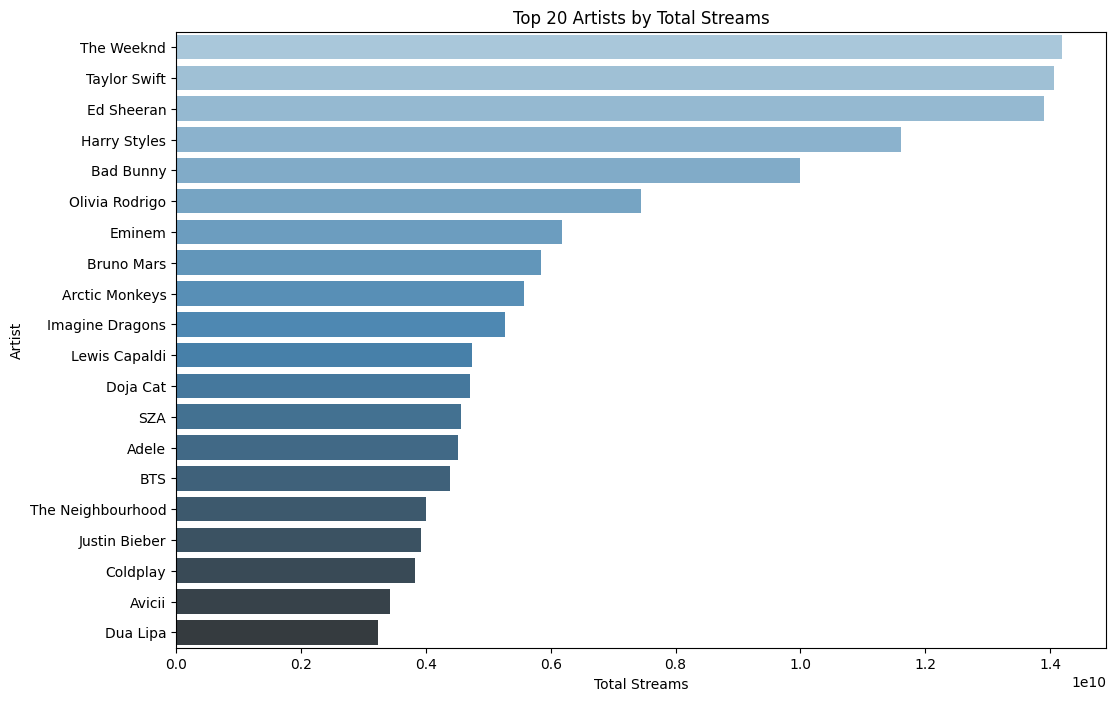

In [39]:
top_artists_streams = artist_analysis.sort_values(by='streams', ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(x='streams', y='artist(s)_name', data=top_artists_streams, palette='Blues_d')
plt.title('Top 20 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()

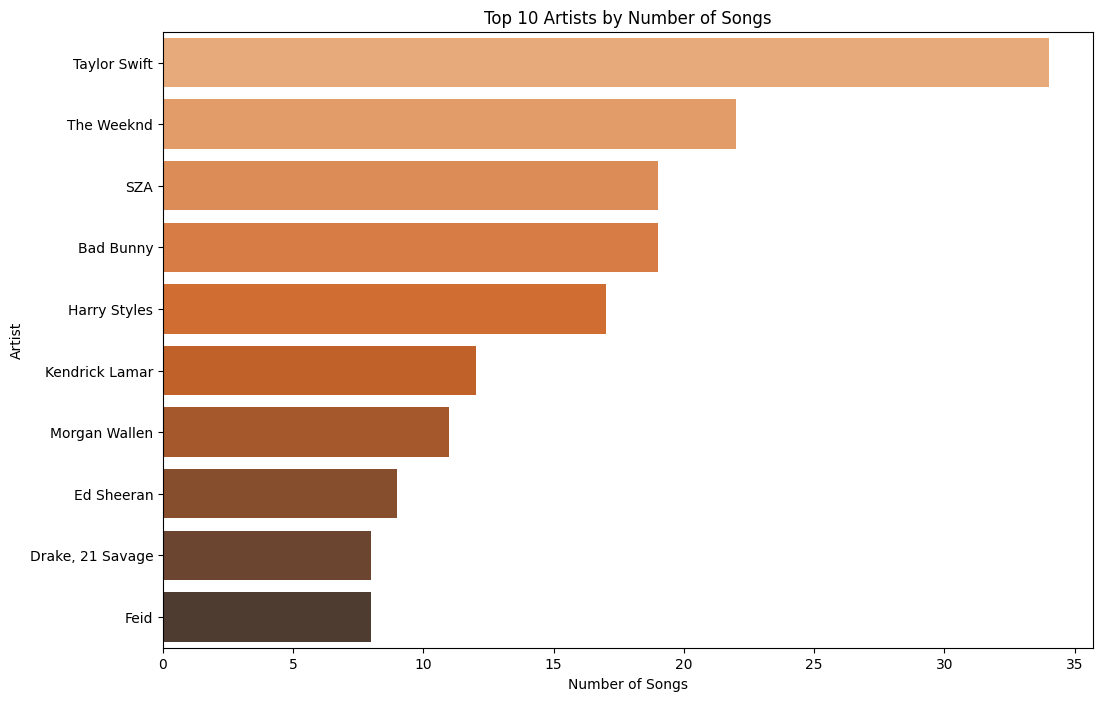

In [40]:
top_artists_tracks = artist_analysis.sort_values(by='num_tracks', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='num_tracks', y='artist(s)_name', data=top_artists_tracks, palette='Oranges_d')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

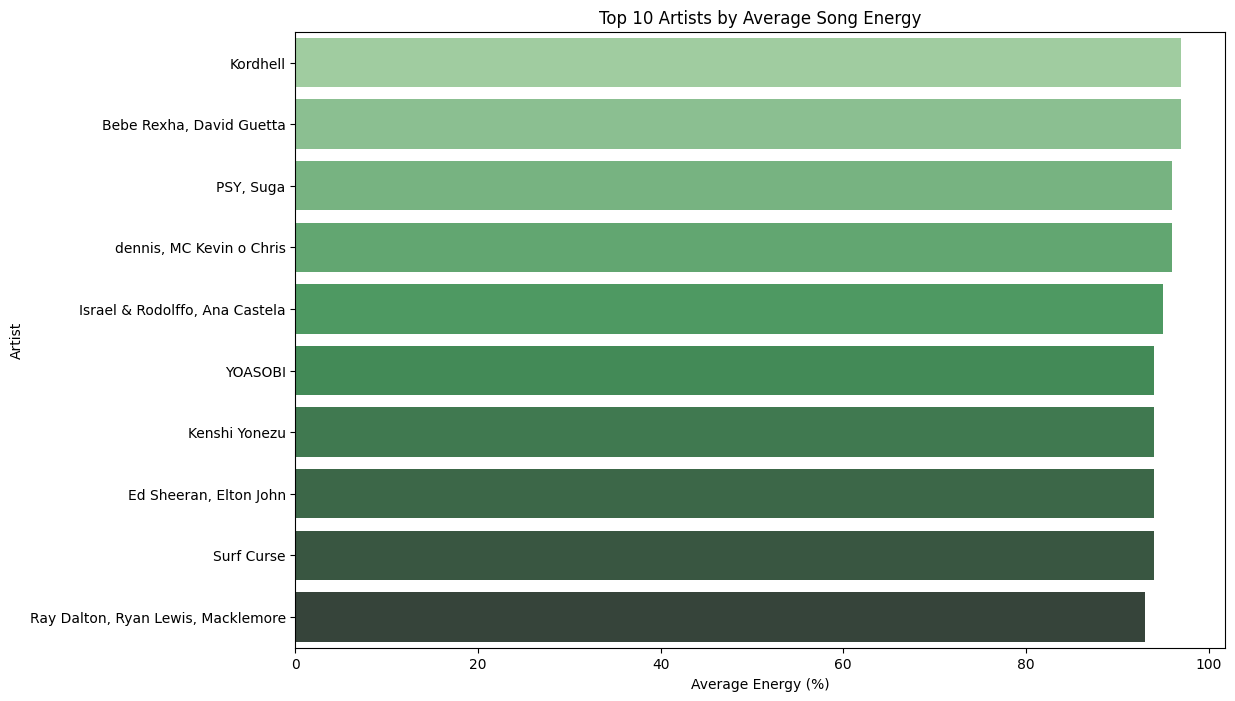

In [41]:
top_artists_energy = artist_analysis.sort_values(by='energy_%', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='energy_%', y='artist(s)_name', data=top_artists_energy, palette='Greens_d')
plt.title('Top 10 Artists by Average Song Energy')
plt.xlabel('Average Energy (%)')
plt.ylabel('Artist')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


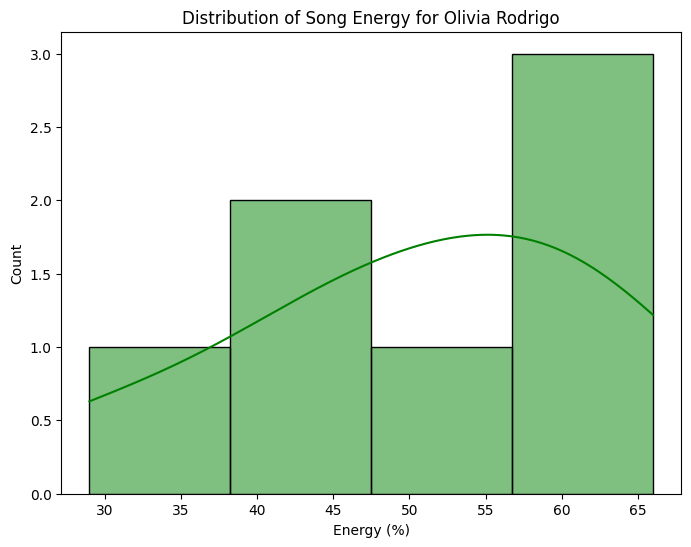

In [42]:
artist_name = "Olivia Rodrigo"
artist_songs = df[df['artist(s)_name'] == artist_name]

plt.figure(figsize=(8,6))
sns.histplot(artist_songs['energy_%'], kde=True, color='green')
plt.title(f'Distribution of Song Energy for {artist_name}')
plt.xlabel('Energy (%)')
plt.ylabel('Count')
plt.show()

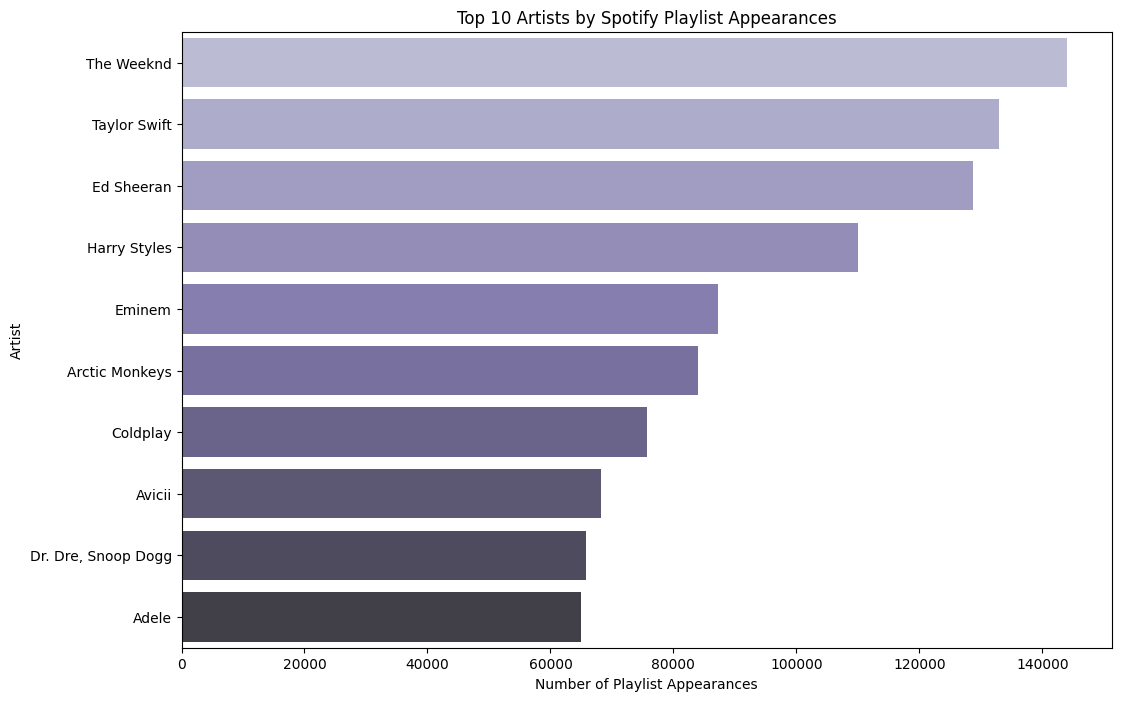

In [43]:
artist_playlists = df.groupby('artist(s)_name').agg({
    'in_spotify_playlists': 'sum',
    'in_apple_playlists': 'sum',
    'in_deezer_playlists': 'sum'
}).reset_index()

top_spotify_artists = artist_playlists.sort_values(by='in_spotify_playlists', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='in_spotify_playlists', y='artist(s)_name', data=top_spotify_artists, palette='Purples_d')
plt.title('Top 10 Artists by Spotify Playlist Appearances')
plt.xlabel('Number of Playlist Appearances')
plt.ylabel('Artist')
plt.show()

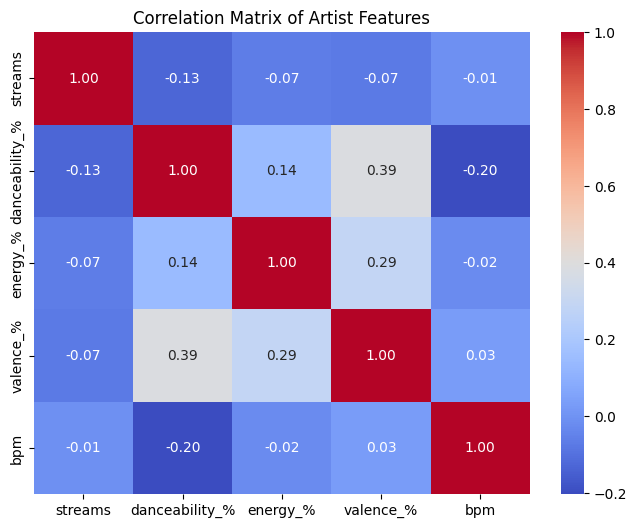

In [44]:
artist_corr = artist_analysis[['streams', 'danceability_%', 'energy_%', 'valence_%', 'bpm']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(artist_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Artist Features')
plt.show()

In [46]:
# time series analysis
df[['released_year', 'released_month', 'released_day']].isnull().sum()

released_year     0
released_month    0
released_day      0
dtype: int64

In [51]:
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                                    df['released_month'].astype(str) + '-' +
                                    df['released_day'].astype(str))

In [52]:
df = df.sort_values('release_date')

In [53]:
df[['track_name', 'artist(s)_name', 'release_date', 'streams']].head()

,track_name,artist(s)_name,release_date,streams
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",1930-01-01,90598517.0
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",1942-01-01,395591396.0
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1946-11-01,389771964.0
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",1950-01-01,473248298.0
459,A Holly Jolly Christmas - Single Version,Burl Ives,1952-01-01,395591396.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


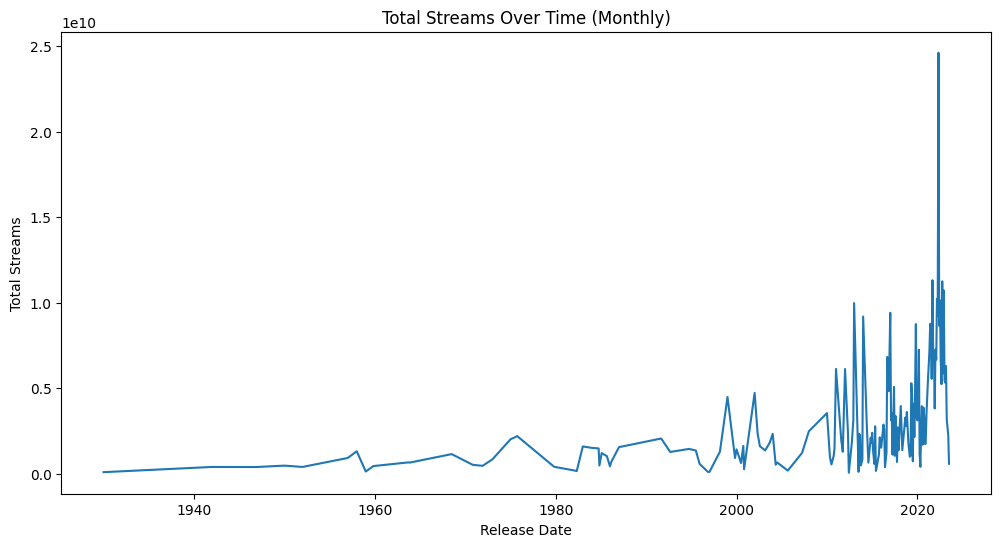

In [54]:
monthly_streams = df.groupby(df['release_date'].dt.to_period('M')).agg({'streams': 'sum'}).reset_index()

monthly_streams['release_date'] = monthly_streams['release_date'].dt.to_timestamp()

# Plot total streams over time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='streams', data=monthly_streams)
plt.title('Total Streams Over Time (Monthly)')
plt.xlabel('Release Date')
plt.ylabel('Total Streams')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

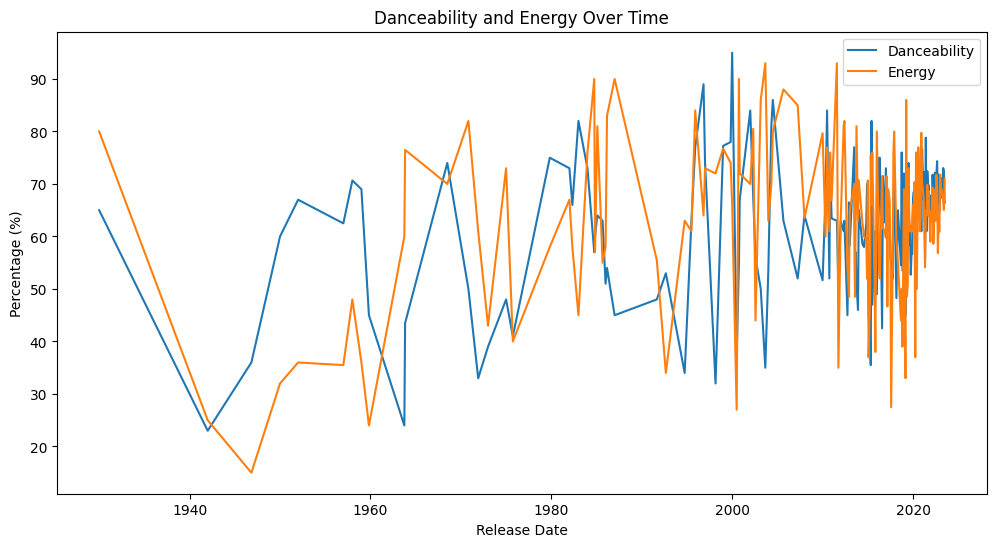

In [55]:
monthly_features = df.groupby(df['release_date'].dt.to_period('M')).agg({
    'danceability_%': 'mean',
    'energy_%': 'mean',
    'valence_%': 'mean',
    'bpm': 'mean'
}).reset_index()

monthly_features['release_date'] = monthly_features['release_date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='danceability_%', data=monthly_features, label='Danceability')
sns.lineplot(x='release_date', y='energy_%', data=monthly_features, label='Energy')
plt.title('Danceability and Energy Over Time')
plt.xlabel('Release Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


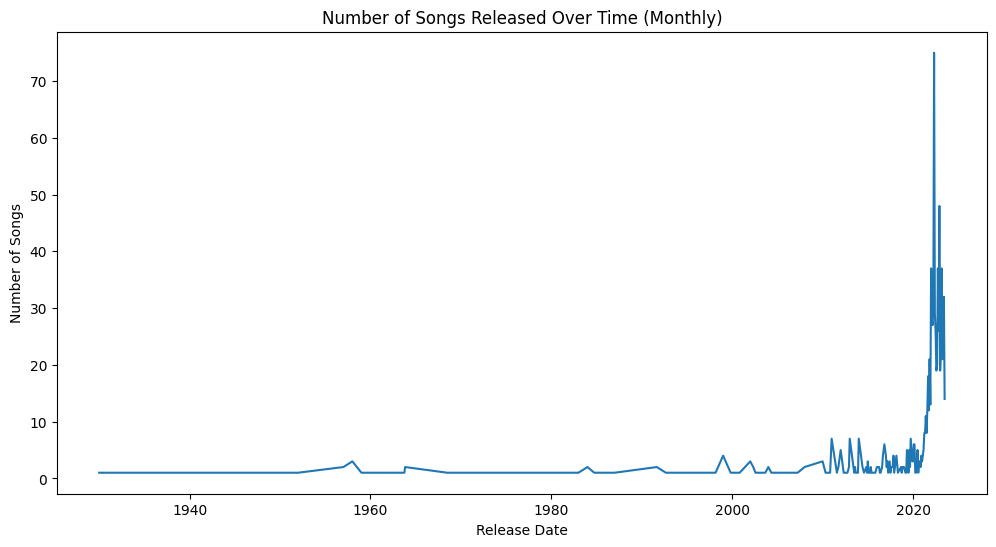

In [56]:
monthly_releases = df.groupby(df['release_date'].dt.to_period('M')).size().reset_index(name='num_songs')

monthly_releases['release_date'] = monthly_releases['release_date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='num_songs', data=monthly_releases)
plt.title('Number of Songs Released Over Time (Monthly)')
plt.xlabel('Release Date')
plt.ylabel('Number of Songs')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


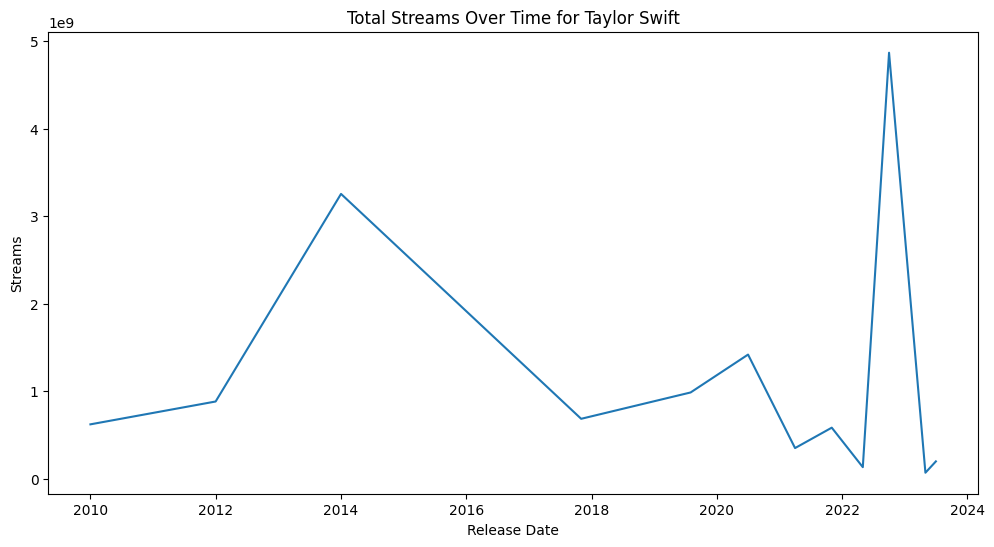

In [58]:
artist_name = 'Taylor Swift'
artist_df = df[df['artist(s)_name'] == artist_name]

artist_streams = artist_df.groupby(artist_df['release_date'].dt.to_period('M')).agg({'streams': 'sum'}).reset_index()
artist_streams['release_date'] = artist_streams['release_date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='streams', data=artist_streams)
plt.title(f'Total Streams Over Time for {artist_name}')
plt.xlabel('Release Date')
plt.ylabel('Streams')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

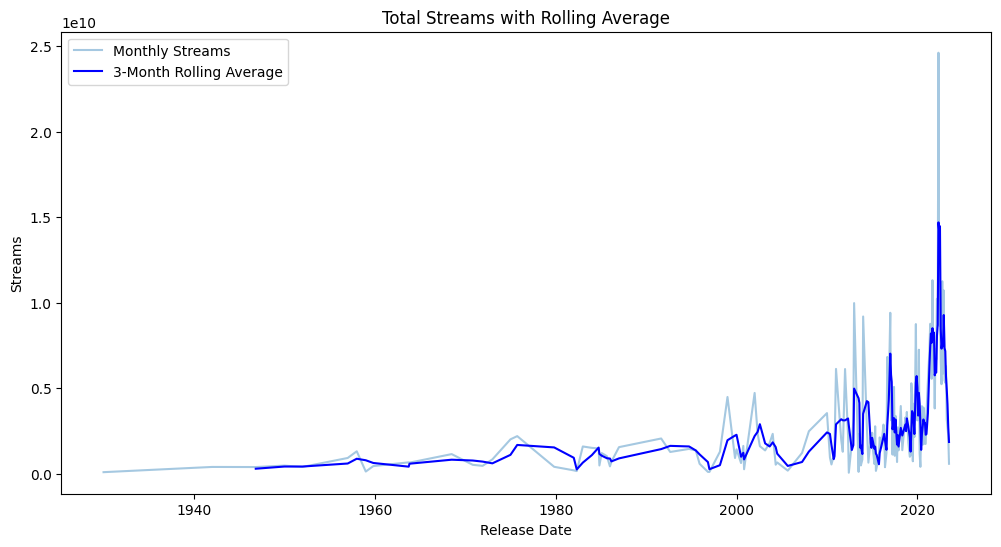

In [59]:
monthly_streams['streams_rolling'] = monthly_streams['streams'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='streams', data=monthly_streams, label='Monthly Streams', alpha=0.4)
sns.lineplot(x='release_date', y='streams_rolling', data=monthly_streams, label='3-Month Rolling Average', color='blue')
plt.title('Total Streams with Rolling Average')
plt.xlabel('Release Date')
plt.ylabel('Streams')
plt.legend()
plt.show()

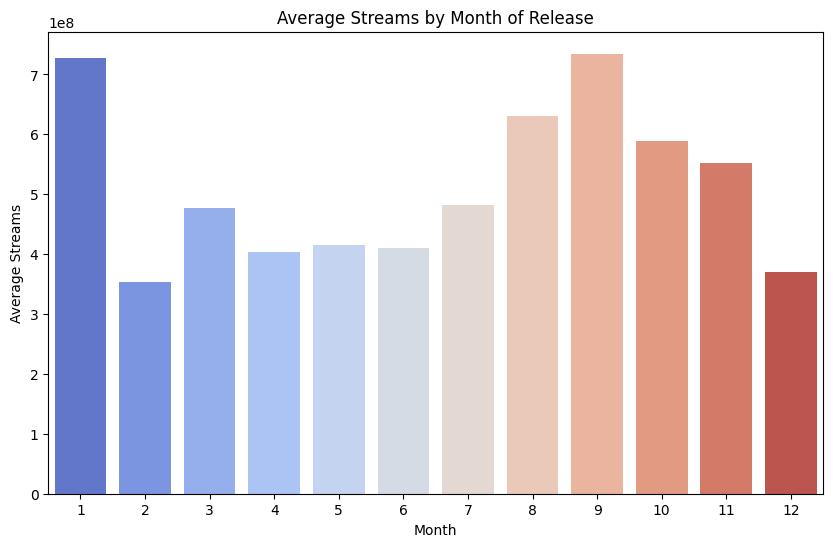

In [60]:
monthly_seasonality = df.groupby(df['release_date'].dt.month).agg({'streams': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='release_date', y='streams', data=monthly_seasonality, palette='coolwarm')
plt.title('Average Streams by Month of Release')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.show()

In [83]:
artist_pattern = '|'.join(indian_artists)
indian_artists = ['Arijit Singh', 'Pritam', 'Amitabh Bhattacharya', 'Sukriti Kakar', 'Sachin-Jigar']
filtered_df = df[df['artist(s)_name'].str.contains(artist_pattern, case=False, regex=True)]
filtered_df[['track_name', 'artist(s)_name', 'release_date', 'streams']]

,track_name,artist(s)_name,release_date,streams
438,"Kesariya (From ""Brahmastra"")","Pritam, Arijit Singh, Amitabh Bhattacharya",2022-07-17,366599607.0
344,"Apna Bana Le (From ""Bhediya"")","Arijit Singh, Sachin-Jigar",2022-11-05,139836056.0
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",2022-12-22,1365184.0
204,"Phir Aur Kya Chahiye (From ""Zara Hatke Zara Ba...","Arijit Singh, Sachin-Jigar, Amitabha Bhattacharya",2023-05-15,64533040.0
137,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",2023-05-22,54225632.0


In [84]:
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

monthly_streams = filtered_df.groupby([filtered_df['release_date'].dt.to_period('M'), 'artist(s)_name'])\
    .agg({'streams': 'sum'}).reset_index()

monthly_streams['release_date'] = monthly_streams['release_date'].dt.to_timestamp()

/tmp/ipykernel_30/2428776290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

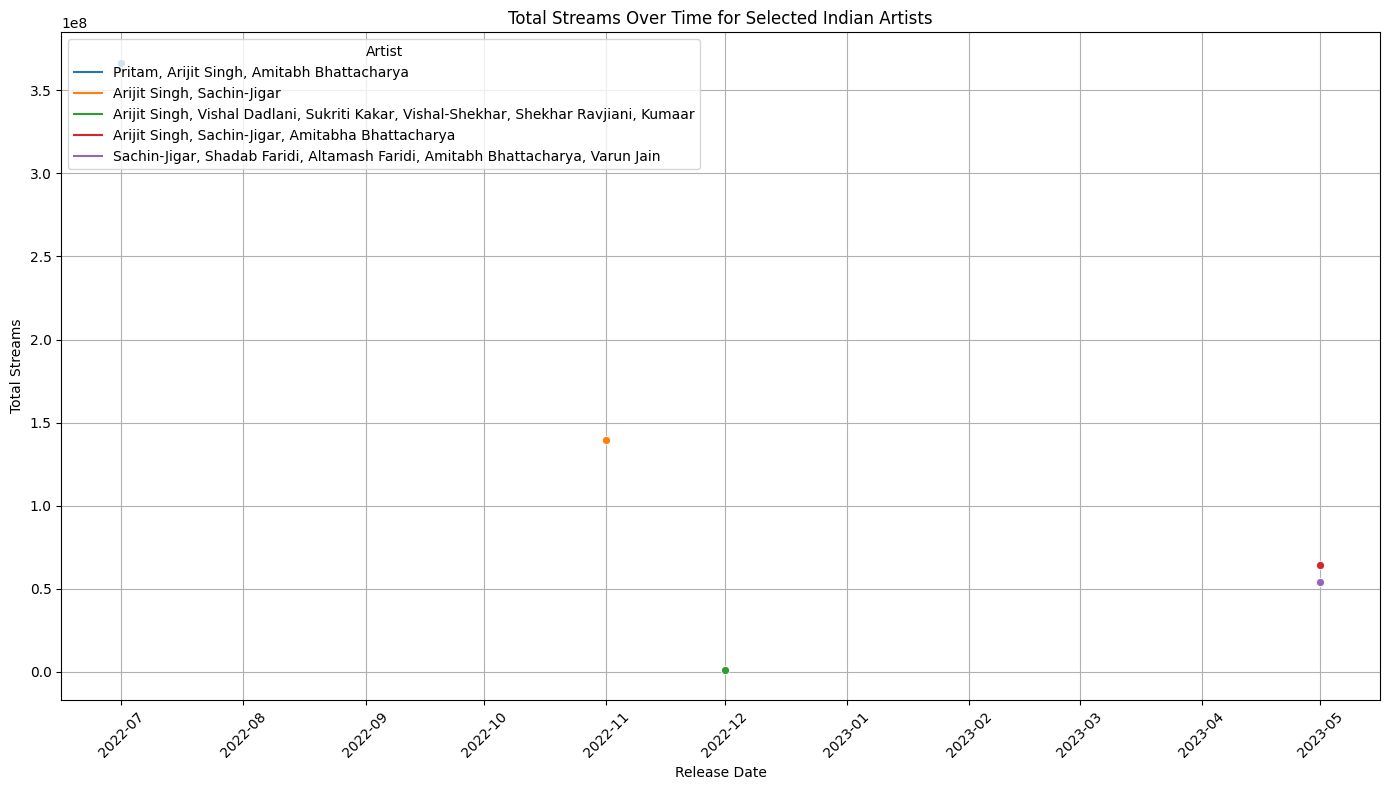

In [85]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot for each artist
sns.lineplot(data=monthly_streams, x='release_date', y='streams', hue='artist(s)_name', marker='o')

# Set plot title and labels
plt.title('Total Streams Over Time for Selected Indian Artists')
plt.xlabel('Release Date')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.legend(title='Artist', loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [93]:
features = ['streams', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%']
clustering_data = df[features]

clustering_data = clustering_data.dropna()  # Optionally fill or drop NA values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

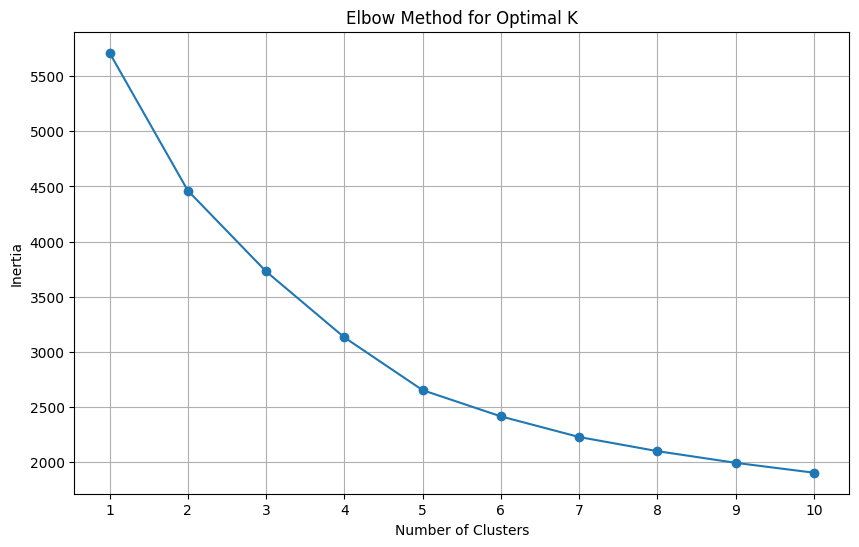

In [94]:
num_songs = clustering_data.shape[0] 
range_values = range(1, min(11, num_songs + 1))
inertia = []
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.grid()
plt.show()

In [95]:
optimal_k = 3  # Replace with the optimal number found from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

df[['track_name', 'artist(s)_name', 'release_date', 'streams', 'cluster']].head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,track_name,artist(s)_name,release_date,streams,cluster
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",1930-01-01,90598517.0,1
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",1942-01-01,395591396.0,0
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1946-11-01,389771964.0,0
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",1950-01-01,473248298.0,0
459,A Holly Jolly Christmas - Single Version,Burl Ives,1952-01-01,395591396.0,0


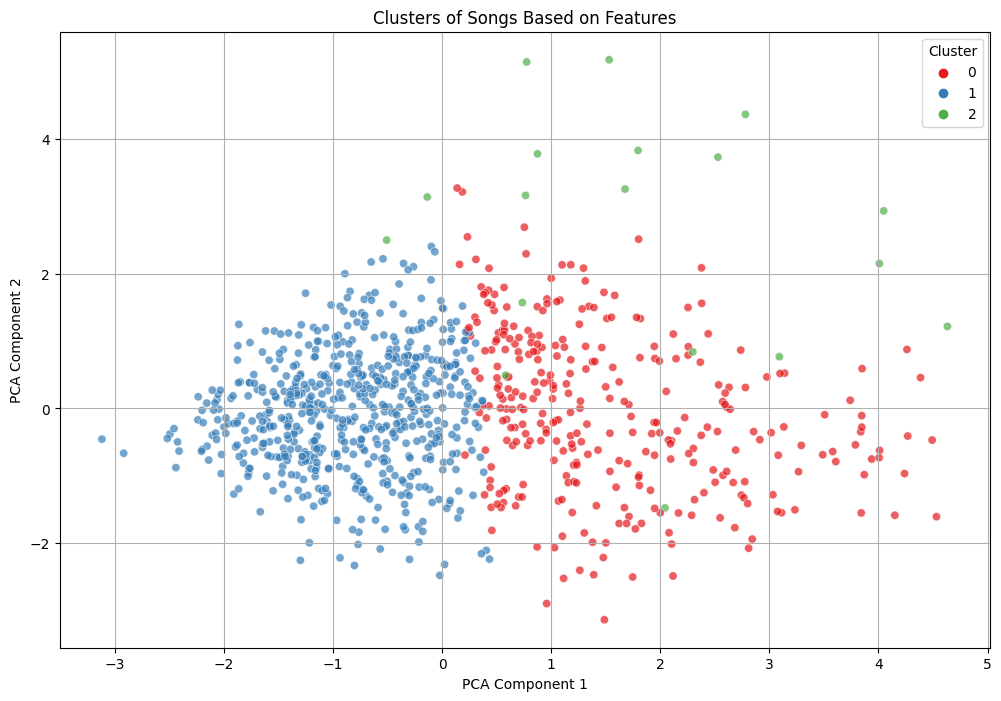

In [98]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data_scaled)

clustered_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
clustered_df['cluster'] = df['cluster'].values

plt.figure(figsize=(12, 8))
sns.scatterplot(data=clustered_df, x='PCA1', y='PCA2', hue='cluster', palette='Set1', alpha=0.7)
plt.title('Clusters of Songs Based on Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

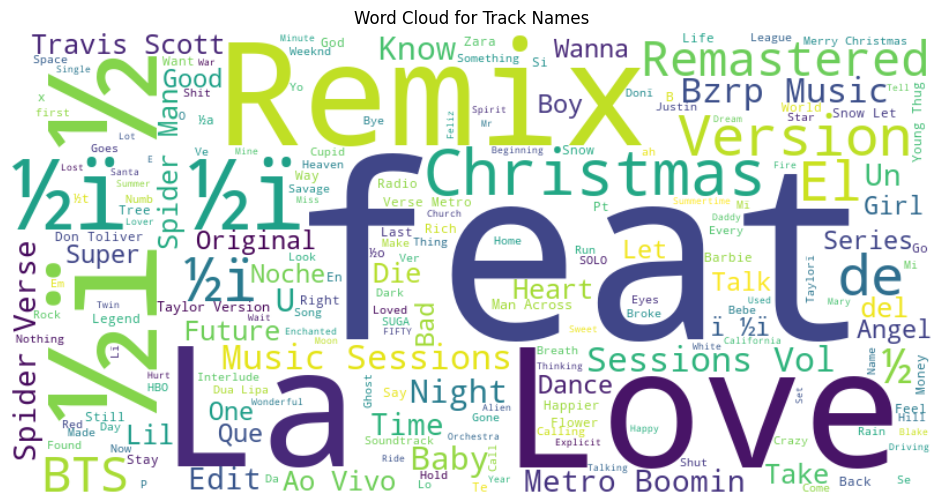

In [100]:
# wordcloud

track_names = ' '.join(df['track_name'].astype(str))
artist_names = ' '.join(df['artist(s)_name'].astype(str))

plt.figure(figsize=(12, 6))
track_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(track_names)
plt.imshow(track_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Track Names')
plt.show()

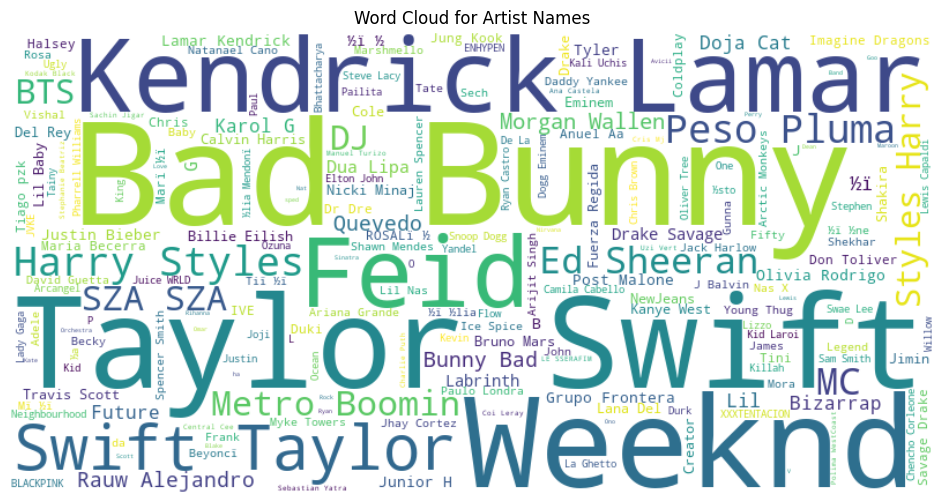

In [101]:
plt.figure(figsize=(12, 6))
artist_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(artist_names)
plt.imshow(artist_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Artist Names')
plt.show()